Documentação: https://henrico.atlassian.net/l/c/0vU3MEcA

# 1 - Importando recursos

In [1]:
# import do pandas para data frame e afins
import pandas as pd

# import das bibliotecas de graficos
import seaborn as sns
import matplotlib.pyplot as plt

# imports sklearn
from sklearn.preprocessing import StandardScaler as ss
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix as matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

# removendo warnings
import warnings

warnings.filterwarnings("ignore")

# 2 - Ler o data set

In [2]:
df = pd.read_csv(
    r"/content/drive/MyDrive/FIAP/COGNITIVE CYBERSECURITY/GS CYBER/PS_20174392719_1491204439457_log.csv"
)

# 3 - Criando funções uteis

In [3]:
def annotateGraph(ax):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = 1
        label = format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha="center",
            va="bottom",
        )

# 4 - Renomeando colunas

In [4]:
df = df.rename(
    columns={
        "oldbalanceOrg": "oldBalanceOrig",
        "newbalanceOrig": "newBalanceOrig",
        "oldbalanceDest": "oldBalanceDest",
        "newbalanceDest": "newBalanceDest",
    }
)

# 5 - Data Mining

In [5]:
df.sample(5)

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
5423455,378,CASH_OUT,22978.47,C1321057121,352577.50,329599.03,C874824883,1561225.62,1584204.09,0,0
3728984,278,CASH_IN,216619.85,C1733376330,790574.76,1007194.62,C8366891,363217.90,146598.05,0,0
6336631,691,CASH_OUT,167801.08,C1832396568,0.00,0.00,C82331433,649713.16,817514.24,0,0
1404416,139,PAYMENT,14689.74,C541647779,0.00,0.00,M1050800679,0.00,0.00,0,0
649092,35,CASH_IN,76077.65,C1945237707,29361.00,105438.65,C508024416,500821.69,439517.01,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldBalanceOrig  float64
 5   newBalanceOrig  float64
 6   nameDest        object 
 7   oldBalanceDest  float64
 8   newBalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.describe()

,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldBalanceOrig,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newBalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldBalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newBalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldBalanceOrig    0
newBalanceOrig    0
nameDest          0
oldBalanceDest    0
newBalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldBalanceOrig    0
newBalanceOrig    0
nameDest          0
oldBalanceDest    0
newBalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldBalanceOrig',
       'newBalanceOrig', 'nameDest', 'oldBalanceDest', 'newBalanceDest',
       'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [12]:
count_type = df["type"].value_counts()
count_type

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [13]:
count_isFraud = df["isFraud"].value_counts()
count_isFraud

0    6354407
1       8213
Name: isFraud, dtype: int64

In [14]:
count_isFlaggedFraud = df["isFlaggedFraud"].value_counts()
count_isFlaggedFraud

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [15]:
filterFraudPayment = df[(df["type"] == "PAYMENT") & (df["isFraud"] == 1)]
len(filterFraudPayment)

0

In [16]:
filterFraudTransfer = df[(df["type"] == "TRANSFER") & (df["isFraud"] == 1)]
len(filterFraudTransfer)

4097

In [17]:
filterFraudCashOut = df[(df["type"] == "CASH_OUT") & (df["isFraud"] == 1)]
len(filterFraudCashOut)

4116

In [18]:
filterFraudCasIn = df[(df["type"] == "CASH_IN") & (df["isFraud"] == 1)]
len(filterFraudCasIn)

0

In [19]:
filterFraudDebit = df[(df["type"] == "DEBIT") & (df["isFraud"] == 1)]
len(filterFraudDebit)

0

### Indentificamos que as fraudes se concentravam nas colunas Transferencia e Cash out, utilizamos filtros para descobrir tal analise.

In [20]:
print(f"Quantidade de Fraudes por Transferencia: {len(filterFraudTransfer)} fraudes")
print(f"Quantidade de Fraudes por Cash Out: {len(filterFraudCashOut)} fraudes")

Quantidade de Fraudes por Transferencia: 4097 fraudes
Quantidade de Fraudes por Cash Out: 4116 fraudes


In [21]:
filterIsFraud = df[df["isFraud"] == 1]
filterIsFraud.sample(10)

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
6281792,651,CASH_OUT,2935952.76,C1884318665,2935952.76,0.0,C687662145,113270.41,3049223.17,1,0
5996408,425,CASH_OUT,0.00,C832555372,0.00,0.0,C1462759334,76759.90,76759.90,1,0
6160866,549,TRANSFER,1057053.60,C625119726,1057053.60,0.0,C1881816007,0.00,0.00,1,0
2730385,212,TRANSFER,3640983.71,C2080183074,3640983.71,0.0,C367657984,0.00,0.00,1,0
6259936,604,TRANSFER,4672401.04,C801580496,4672401.04,0.0,C1917884973,0.00,0.00,1,0
7002,6,TRANSFER,10224.00,C365589282,10224.00,0.0,C908043384,0.00,0.00,1,0
3925696,285,CASH_OUT,6249265.86,C435417424,6249265.86,0.0,C1577595866,0.00,6249265.86,1,0
1059618,109,TRANSFER,126375.17,C83653019,126375.17,0.0,C1418842986,0.00,0.00,1,0
6281801,652,TRANSFER,2911505.23,C1683729969,2911505.23,0.0,C557033420,0.00,0.00,1,0
1930347,169,TRANSFER,978261.98,C1454479269,978261.98,0.0,C478742844,0.00,0.00,1,0


# 6 - Data Cleaning

In [22]:
df = df.drop_duplicates()
df

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [23]:
df = df.drop(columns=["nameOrig", "nameDest", "isFlaggedFraud"])
df

,step,type,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


# 7 - Data Visualization

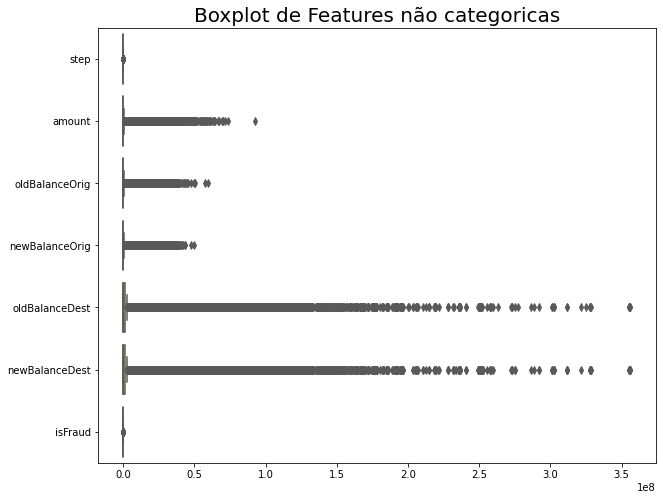

In [24]:
plt.figure(figsize=(10, 8))

ax = sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplot de Features não categoricas", fontsize=20)

plt.show()

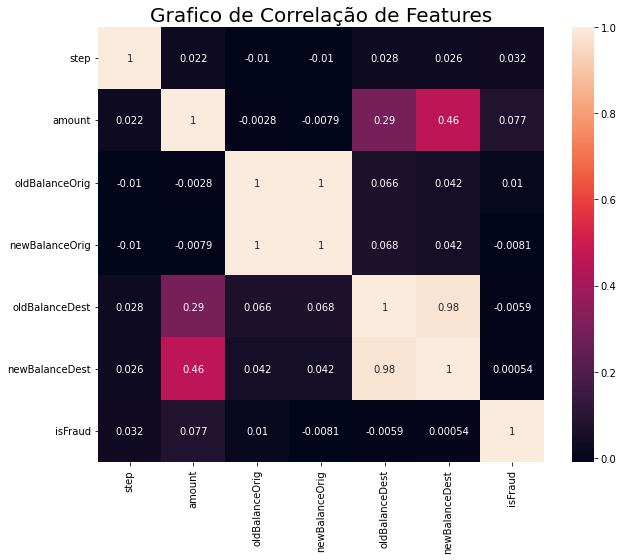

In [25]:
plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(), annot=True)
plt.title("Grafico de Correlação de Features", fontsize=20)

plt.show()

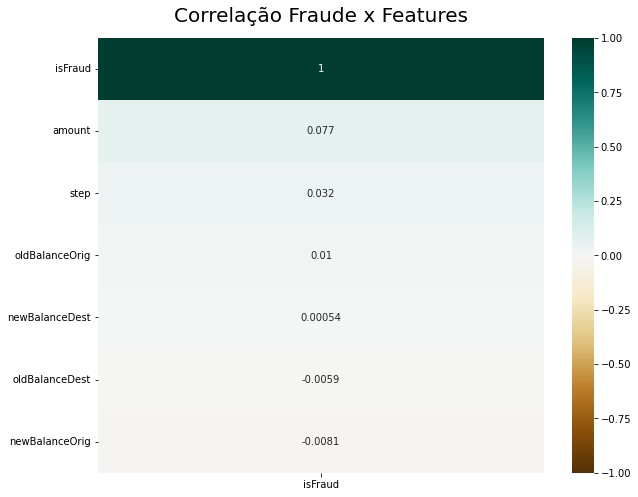

In [26]:
plt.figure(figsize=(10, 8))

corr_by_fraud = sns.heatmap(
    df.corr()[["isFraud"]].sort_values(by="isFraud", ascending=False),
    vmin=-1,
    vmax=1,
    cmap="BrBG",
    annot=True,
)

corr_by_fraud.set_title(
    "Correlação Fraude x Features", fontdict={"fontsize": 20}, pad=16
)

plt.show()

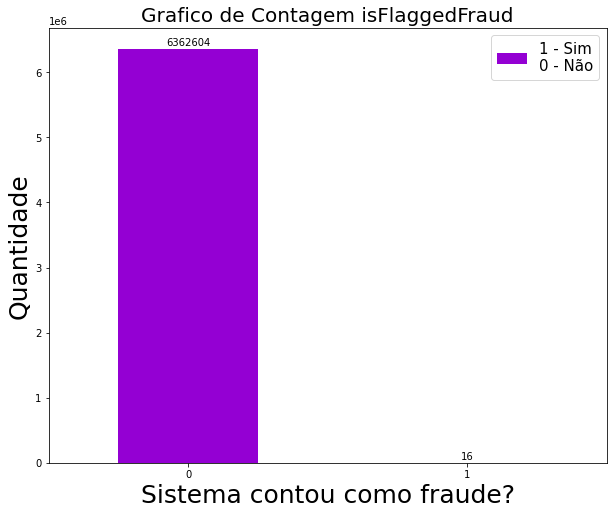

In [27]:
plt.figure(figsize=(10, 8))

ax = count_isFlaggedFraud.plot(kind="bar", rot=0, color="DarkViolet")

plt.title("Grafico de Contagem isFlaggedFraud", fontsize=20)
plt.xlabel("Sistema contou como fraude?", fontsize=25)
plt.ylabel("Quantidade", fontsize=25)
plt.legend(["1 - Sim\n0 - Não"], fontsize=15)

annotateGraph(ax)

plt.show()

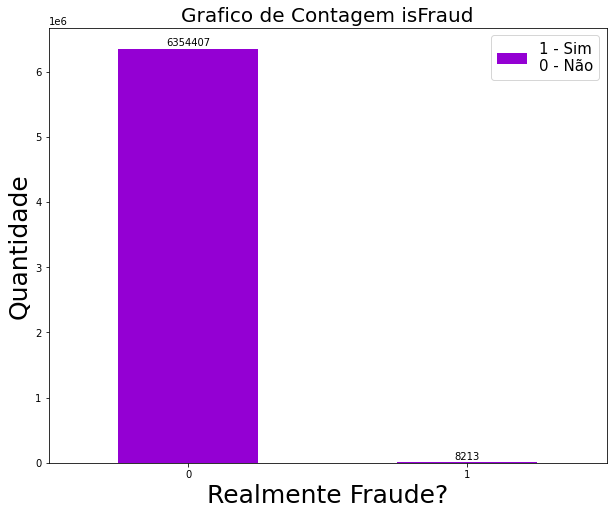

In [28]:
plt.figure(figsize=(10, 8))

ax = count_isFraud.plot(kind="bar", rot=0, color="DarkViolet")

plt.title("Grafico de Contagem isFraud", fontsize=20)
plt.xlabel("Realmente Fraude?", fontsize=25)
plt.ylabel("Quantidade", fontsize=25)
plt.legend(["1 - Sim\n0 - Não"], fontsize=15)

annotateGraph(ax)

plt.show()

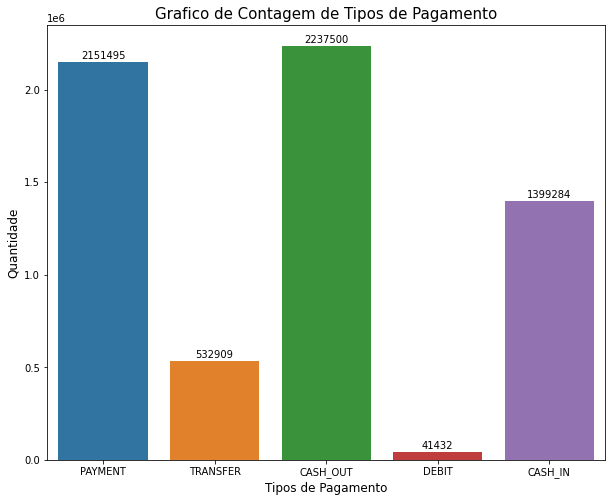

In [29]:
plt.figure(figsize=(10, 8))

count_type = df["type"]

ax = sns.countplot(x=count_type, data=df)

plt.title("Grafico de Contagem de Tipos de Pagamento", fontsize=15)
plt.xlabel("Tipos de Pagamento", fontsize=12)
plt.ylabel("Quantidade", fontsize=12)

annotateGraph(ax)

plt.show()

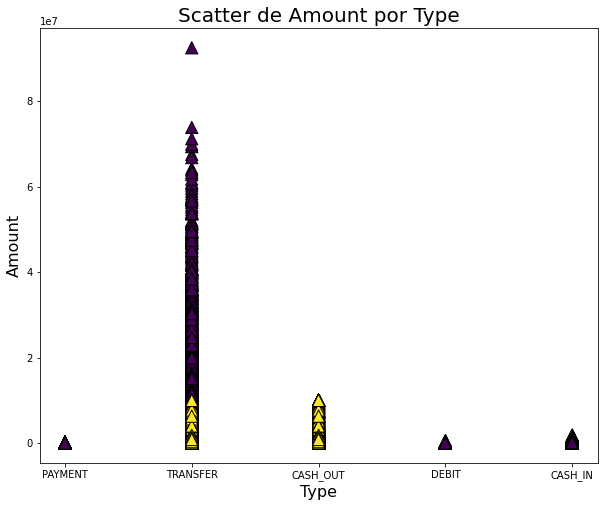

In [30]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.scatter(
    x=df["type"], y=df["amount"], c=df["isFraud"], s=150, marker="^", edgecolors="k"
)

plt.title("Scatter de Amount por Type", fontsize=20)
plt.xlabel("Type", fontsize=16)
plt.ylabel("Amount", fontsize=16)

plt.show()

### Transformando dados categoricos em numericos

In [31]:
transformer = lambda x: x.astype("category").cat.codes

In [32]:
df["type"] = transformer(df["type"])
df["type"]

0          3
1          3
2          4
3          1
4          3
          ..
6362615    1
6362616    4
6362617    1
6362618    4
6362619    1
Name: type, Length: 6362620, dtype: int8

In [33]:
df

,step,type,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,4,181.00,181.00,0.00,0.00,0.00,1
3,1,1,181.00,181.00,0.00,21182.00,0.00,1
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,1


# 8 - Preditive Modelling and Final Visualization

In [34]:
X = df.drop(columns=["isFraud"])
y = df["isFraud"]

x_train, x_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [35]:
logistic_regression1 = LogisticRegression()
logistic_regression1.fit(x_train, y_train)

y_pred = logistic_regression1.predict(x_test)

### Sem dados Padronizados

------------------------------
Metricas - Logistic Regression - Sem dados Padronizados
------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.36      0.41      0.38      1620

    accuracy                           1.00   1272524
   macro avg       0.68      0.71      0.69   1272524
weighted avg       1.00      1.00      1.00   1272524

------------------------------


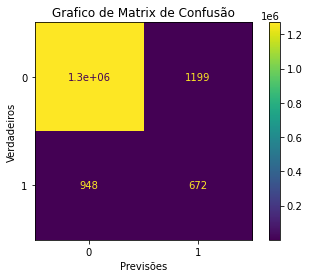

------------------------------


In [36]:
print("-" * 30)
print("Metricas - Logistic Regression - Sem dados Padronizados")
print("-" * 30)
# print(average_precision_score(y_test, y_pred))
# print("-" * 30)
print(classification_report(y_test, y_pred))
print("-" * 30)
matrix(logistic_regression1, x_test, y_test)
plt.title("Grafico de Matrix de Confusão")
plt.xlabel("Previsões")
plt.ylabel("Verdadeiros")
plt.show()
print("-" * 30)

### Padronizando os dados

In [37]:
scaler = ss()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [38]:
logistic_regression2 = LogisticRegression(random_state=1)
logistic_regression2.fit(x_train_scaled, y_train)

y_pred = logistic_regression2.predict(x_test_scaled)

------------------------------
Metricas - Logistic Regression - Com dados Padronizados
------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.90      0.42      0.57      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.71      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524

------------------------------


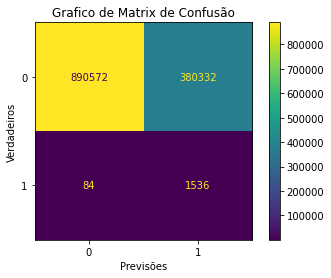

------------------------------


In [39]:
print("-" * 30)
print("Metricas - Logistic Regression - Com dados Padronizados")
print("-" * 30)
# print(average_precision_score(y_test, y_pred))
# print("-" * 30)
print(classification_report(y_test, y_pred))
print("-" * 30)
matrix(logistic_regression2, x_test, y_test)
plt.title("Grafico de Matrix de Confusão")
plt.xlabel("Previsões")
plt.ylabel("Verdadeiros")
plt.show()
print("-" * 30)

### Utilizando outro modelo de classificação (KNN)

------------------------------
Metricas - KNeighborsClassifier
------------------------------
Score: 0.9995
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.90      0.42      0.57      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.71      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524



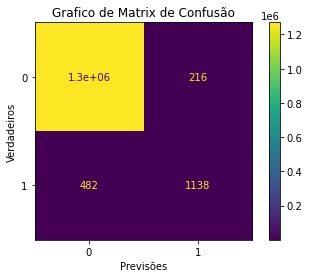

In [40]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
score = knn.score(x_test, y_test)

print("-" * 30)
print("Metricas - KNeighborsClassifier")
print("-" * 30)

print(f"Score: {round(score, 4)}")

print(classification_report(y_test, y_pred))

matrix(knn, x_test, y_test)
plt.title("Grafico de Matrix de Confusão")
plt.xlabel("Previsões")
plt.ylabel("Verdadeiros")
plt.show()

# 9 - Conclusão

Os modelos de machine learning, Logistic Regression e KNN, performaram de maneira adequada, juntamente com todo o processo de ciclo de vida de machine learning, desde o data mining, até o data visualization ajudaram a concluir o desafio do Kaggle.